In [ ]:
# Tarea Semanal 4: Simulación de un ADC (cuantización) parte 2/2
## Magdalena Noé
Descripcion

#### Librerias:

In [5]:
import numpy as np
import matplotlib.pyplot as plt #Para la visualizacion de tt y xx.
from numpy.fft import fft #Para poder escribir fft() en vez de numpy.fft.fft()

## Generacion de la señal discreta sR con ruido

Señal seno

In [16]:
fs = 1000 # [Hz]
N = fs
fo = fs/N # [Hz]
Vmax = 1 #[Volts]

def mi_funcion_sen(vmax=1,dc=0,ff=1,ph=0,nn=1000,fs=1000):
    t = np.arange(nn) / fs
    sin = vmax * np.sin(t*2*np.pi*ff + ph) + dc
    return t, sin

t,s = mi_funcion_sen(fs=fs, nn=N, ff=fo, vmax=Vmax)

Contaminacion de la señal y cuantizacion del resultado

In [20]:
Vf = 2 #[Volts] 
b = 4 # Bits
q = Vf/2**(b-1)
kn = 1
Pq = q**2/12
Pn = kn * Pq
n = np.random.normal(loc=0, scale=np.sqrt(Pn), size=N)

sR = s + n
sQ = np.round(sR / q) * q

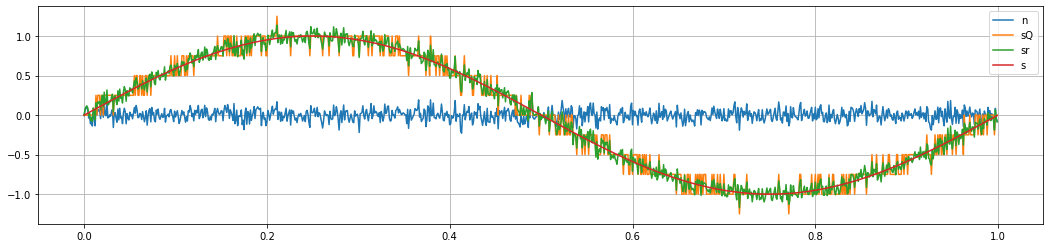

In [21]:
plt.figure(figsize=(18, 4))
graficar_funcion(t,[n,sQ,sR,s],["n","sQ","sr","s"])

### Funciones graficadoras
Funciones utilizadas para realizar los graficos

In [22]:
def graficar_error(error, titulo=""):
    plt.hist(error, bins=50, density=True)
    plt.title(titulo)
    #plt.xlabel("Error")
    plt.ylabel("Densidad")
    plt.grid(True)
    return


def graficar_funcion(abs,ord,leg="",label_y="",label_x="",titulo="",xlim=0,show=1):
    for k in np.arange(len(ord)):
        plt.plot(abs, ord[k], label=leg[k])
    if(xlim):
        plt.xlim(0, xlim)
    else:
        plt.axis('tight')

    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(titulo)
    plt.grid()
    plt.legend()
    if(show): #Para manejar subplots por fuera de la funcion
        plt.show()
    return